# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [3]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [4]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [5]:
def P1(num_examples=5):
### STUDENT START ###
    for i in range(num_examples):
        print "Category: " + newsgroups_train.target_names[train_labels[i]]
        print ''
        print train_data[i]
        print ''
        print ''
### STUDENT END ###
P1()

Category: comp.graphics

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Category: talk.religion.misc



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.


Ca

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [6]:
def P2():
### STUDENT START ###

    #***********
    #a
    #***********

    #Initialize the vectorizer
    gen_features = CountVectorizer()

    #fit to training data
    vocab_counts = gen_features.fit_transform(train_data)
    
    print "Part A"
    
    #The size of the vocabulary is 26,879 words.
    print "The size of the vocabulary in the training data is : " + str(vocab_counts.shape[1])

    #Get count of non-zero values
    print "The number of non-zero values in the vocabulary matrix is : " + str(vocab_counts.nnz)

    #Get share of non-zero values
    print "The share of non-zero values in the vocabulary matrix is : " + \
        str(vocab_counts.nnz / (1.0 * vocab_counts.shape[0] * vocab_counts.shape[1]))

    print ""

    #***********
    #b
    #***********

    #Initialize the vectorizer
    gen_features = CountVectorizer()

    #Fit to the training data
    gen_features.fit_transform(train_data)

    print "Part B"
    
    print "The first feature by alphabetical order is: " + gen_features.get_feature_names()[0]

    print "The last feature by alphabetical order is: " + \
        gen_features.get_feature_names()[len(gen_features.get_feature_names()) - 1]

    print ""


    #***********
    #c
    #***********

    #define the vocab list we want to look at
    vocab_list = ["atheism", "graphics", "space", "religion"]

    #Initialize an instance of the vectorizer, setting the vocabulary list
    gen_features_spec_voc = CountVectorizer(vocabulary = vocab_list)

    #get counts of each word in our vocabulary list by fitting to the training data
    spec_voc_counts = gen_features_spec_voc.fit_transform(train_data)

    #check shape of the result
    spec_voc_counts.shape

    print "Part C"
    
    #Get share of non-zero values
    print "The share of non-zero values in the vocabulary matrix is : " + \
        str(spec_voc_counts.nnz / (1.0 * spec_voc_counts.shape[0] * spec_voc_counts.shape[1]))

    print ""

    #***********
    #d
    #***********

    #Initialize an instance of the vectorizer, choosing to look for two and three word features
    gen_features_ngrams = CountVectorizer(analyzer = 'word', ngram_range = (2,3))

    #fit the vectorizer to the training data
    ngram_vocab = gen_features_ngrams.fit_transform(train_data)

    print "Part D"
    
    #Getting counts of bigrams and trigrams yields a vocabulary of 510,583 ngrams
    print "Getting counts of bigrams and trigrams yields a vocabulary of size: " + str(ngram_vocab.shape[1])

    print ""

    #***********
    #e
    #***********

    #Initialize an instance of the vectorizer removing words that appear in fewer than ten documents
    gen_features_min_docs = CountVectorizer(min_df = 10)

    #fit to the training data
    pruned_vocab = gen_features_min_docs.fit_transform(train_data)

    print "Part E"
    
    print "The pruned vocabulary yields a vocabulary of size: " + str(pruned_vocab.shape[1])

    print ""

    #***********
    #f
    #***********

    #Initialize an instance of the vectorizer
    gen_features = CountVectorizer()

    #fit to the training data
    train_data_vocab = gen_features.fit_transform(train_data)

    #Get list of the feature names in training data
    train_data_features = gen_features.get_feature_names()

    #fit to the dev data
    dev_data_vocab = gen_features.fit_transform(dev_data)

    #Get list of the feature names in the dev data
    dev_data_features = gen_features.get_feature_names()

    #Find how many of the dev data vocab words are not in the training data
    overlap = len(set(train_data_features) & set(dev_data_features))

    print "Part F"
    
    print "There are " + str(len(dev_data_features) - overlap) + " vocab words that appear in the dev data and not in the training data."

### STUDENT END ###
P2()

Part A
The size of the vocabulary in the training data is : 26879
The number of non-zero values in the vocabulary matrix is : 196700
The share of non-zero values in the vocabulary matrix is : 0.00359782722696

Part B
The first feature by alphabetical order is: 00
The last feature by alphabetical order is: zyxel

Part C
The share of non-zero values in the vocabulary matrix is : 0.0671091445428

Part D
Getting counts of bigrams and trigrams yields a vocabulary of size: 510583

Part E
The pruned vocabulary yields a vocabulary of size: 3064

Part F
There are 4027 vocab words that appear in the dev data and not in the training data.


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

The optimal number of neighbors is: 151


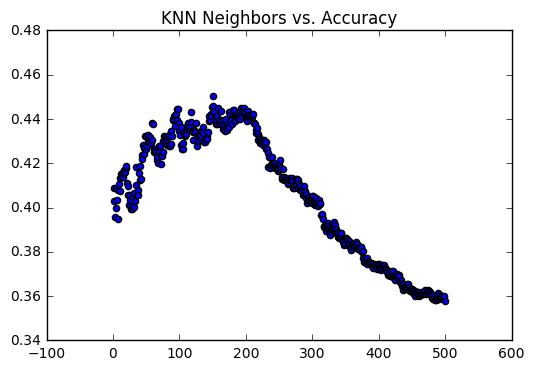

In [50]:
#***********
#knn
#***********

#Instantiate an instance of the vectorizer
gen_features = CountVectorizer()

#generate a feature matrix for the training data
train_data_features = gen_features.fit_transform(train_data)

#max neighbors
max_neighbors = 501

#create a list of possible k values
k_options = {'n_neighbors': range(1,max_neighbors)}

#Instantiate a KNN classifier
knn_ksearch = GridSearchCV(KNeighborsClassifier(), k_options)

#fit the KNN classifier
knn_ksearch.fit(train_data_features, train_labels)

#Get mean scores
grid_search_results = knn_ksearch.grid_scores_

#Get best K value
knn_ksearch.best_params_

#Get mean scores
mean_scores = []

for i in range(0,max_neighbors-1):
    mean_scores.append(grid_search_results[i][1])


#Plot accuracy vs. number of neighbors
plt.scatter(range(1,max_neighbors), mean_scores)
plt.title('KNN \n Number of Neighbors vs. Accuracy')

print 'The optimal number of neighbors is: ' + str(knn_ksearch.best_params_['n_neighbors'])


The optimal alpha is: {'alpha': 0.0035999999999999999}
0.830875122911


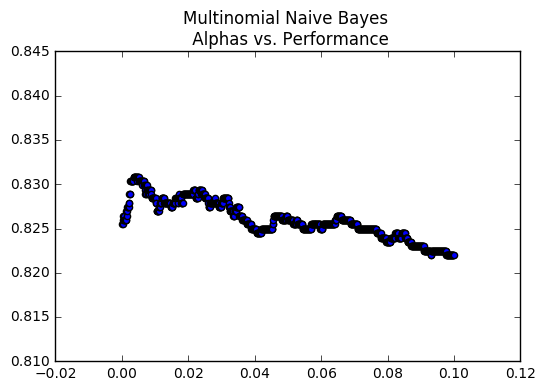

In [54]:
#***********
#Multinomial Naive Bayes
#***********

#Instantiate an instance of the vectorizer
gen_features = CountVectorizer()

#generate a feature matrix for the training data
train_data_features = gen_features.fit_transform(train_data)

#Define the alpha values we want to try
alphas_to_try = np.arange(0.0001, 0.1, 0.0001)

alphas = {'alpha': alphas_to_try}

#Define the classifier
mnb_alphasearch = GridSearchCV(MultinomialNB(), alphas)

#fit the classifier
mnb_alphasearch.fit(train_data_features, train_labels)

#Get the mean scores for each alpha tried by the grid search
alphasearch_results = mnb_alphasearch.grid_scores_

#Get mean scores
mean_scores = []

for i in range(0,len(alphas_to_try)):
    mean_scores.append(alphasearch_results[i][1])


#return the model fit
print 'The optimal alpha is: ' + str(mnb_alphasearch.best_params_)
print mnb_alphasearch.best_score_

#plot alphas against performance
plt.scatter(alphas_to_try, mean_scores)
plt.title('Multinomial Naive Bayes \n Alphas vs. Performance')


The optimal C is: {'C': 0.17000000000000001}
0.776794493609


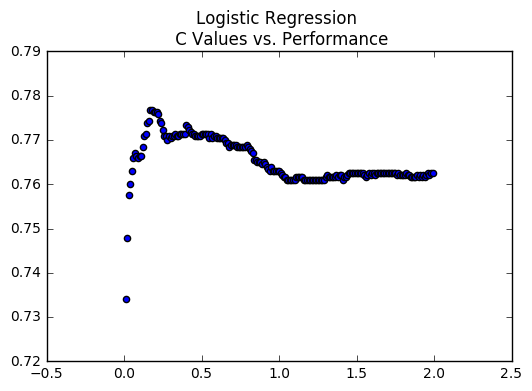

In [56]:
#***********
#Logistic Regression
#***********

#Instantiate an instance of the vectorizer
gen_features = CountVectorizer()

#generate a feature matrix for the training data
train_data_features = gen_features.fit_transform(train_data)

#Define a list of the c values to try
c_vals_to_try = np.arange(0.01,2,0.01)

c_vals = {'C': c_vals_to_try}

#Instantiate an instance of the logistic regression classifier
logr_Csearch = GridSearchCV(LogisticRegression(), c_vals)

#fit the model
logr_Csearch.fit(train_data_features, train_labels)

#Get the mean scores
Csearch_results = logr_Csearch.grid_scores_

mean_scores = []

for i in range(0,len(c_vals_to_try)):
    mean_scores.append(Csearch_results[i][1])

#return the model fit
print 'The optimal C is: ' + str(logr_Csearch.best_params_)
print logr_Csearch.best_score_

#plot alphas against performance
plt.scatter(c_vals_to_try, mean_scores)
plt.title('Logistic Regression \n C Values vs. Performance')


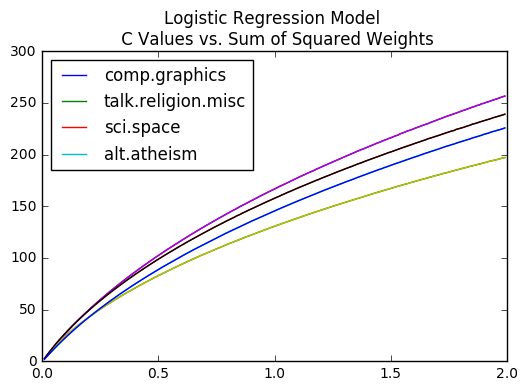

In [96]:
#Logistic regression estimates a weight vector for each class, which you can access with the coef_ attribute.
#Output the sum of the squared weight values for each class for each setting of the C parameter.
#Briefly explain the relationship between the sum and the value of C.

weight_vals_sum_sq = []

#loop through C values
for c in c_vals_to_try:

    #Instantiate a logistic regression estimator
    logReg = LogisticRegression(C = c)

    #Fit the model to the training data
    logReg.fit(train_data_features, train_labels)

    #Get the sum of squared weight values for each class
    sum_sq = np.sum(logReg.coef_ ** 2, axis = 1)
    
    #Append sums to list to store
    weight_vals_sum_sq.append(sum_sq)

#Plot sum of squared weights against c values 
plt.plot(c_vals_to_try, weight_vals_sum_sq)
plt.title("Logistic Regression Model \n C Values vs. Sum of Squared Weights")
plt.legend()

#Get labels of each category
legend_labels = []

for i in np.unique(train_labels):
    legend_labels.append(newsgroups_train.target_names[train_labels[i]])
    
#Plot C values against sum of squared weights
plt.plot(c_vals_to_try, weight_vals_sum_sq)
plt.title("Logistic Regression Model \n C Values vs. Sum of Squared Weights")
plt.legend(legend_labels, loc = 'best')



In [97]:
def P3():
### STUDENT START ###
    #***********
    #knn
    #***********

    #Instantiate an instance of the vectorizer
    gen_features = CountVectorizer()

    #generate a feature matrix for the training data
    train_data_features = gen_features.fit_transform(train_data)

    #max neighbors
    max_neighbors = 501

    #create a list of possible k values
    k_options = {'n_neighbors': range(1,max_neighbors)}

    #Instantiate a KNN classifier
    knn_ksearch = GridSearchCV(KNeighborsClassifier(), k_options)

    #fit the KNN classifier
    knn_ksearch.fit(train_data_features, train_labels)

    #Get mean scores
    grid_search_results = knn_ksearch.grid_scores_

    #Get best K value
    knn_ksearch.best_params_

    #Get mean scores
    mean_scores = []

    for i in range(0,max_neighbors-1):
        mean_scores.append(grid_search_results[i][1])


    #Plot accuracy vs. number of neighbors
    plt.scatter(range(1,max_neighbors), mean_scores)
    plt.title('KNN \n Number of Neighbors vs. Accuracy')

    print 'The optimal number of neighbors is: ' + str(knn_ksearch.best_params_['n_neighbors'])

    
    #***********
    #Multinomial Naive Bayes
    #***********

    #Instantiate an instance of the vectorizer
    gen_features = CountVectorizer()

    #generate a feature matrix for the training data
    train_data_features = gen_features.fit_transform(train_data)

    #Define the alpha values we want to try
    alphas_to_try = np.arange(0.0001, 0.1, 0.0001)

    alphas = {'alpha': alphas_to_try}

    #Define the classifier
    mnb_alphasearch = GridSearchCV(MultinomialNB(), alphas)

    #fit the classifier
    mnb_alphasearch.fit(train_data_features, train_labels)

    #Get the mean scores for each alpha tried by the grid search
    alphasearch_results = mnb_alphasearch.grid_scores_

    #Get mean scores
    mean_scores = []

    for i in range(0,len(alphas_to_try)):
        mean_scores.append(alphasearch_results[i][1])


    #return the model fit
    print 'The optimal alpha is: ' + str(mnb_alphasearch.best_params_)
    print mnb_alphasearch.best_score_

    #plot alphas against performance
    plt.scatter(alphas_to_try, mean_scores)
    plt.title('Multinomial Naive Bayes \n Alphas vs. Performance')
    
    
    #***********
    #Logistic Regression
    #***********

    #Instantiate an instance of the vectorizer
    gen_features = CountVectorizer()

    #generate a feature matrix for the training data
    train_data_features = gen_features.fit_transform(train_data)

    #Define a list of the c values to try
    c_vals_to_try = np.arange(0.01,2,0.01)

    c_vals = {'C': c_vals_to_try}

    #Instantiate an instance of the logistic regression classifier
    logr_Csearch = GridSearchCV(LogisticRegression(), c_vals)

    #fit the model
    logr_Csearch.fit(train_data_features, train_labels)

    #Get the mean scores
    Csearch_results = logr_Csearch.grid_scores_

    mean_scores = []

    for i in range(0,len(c_vals_to_try)):
        mean_scores.append(Csearch_results[i][1])

    #return the model fit
    print 'The optimal C is: ' + str(logr_Csearch.best_params_)
    print logr_Csearch.best_score_

    #plot alphas against performance
    plt.scatter(c_vals_to_try, mean_scores)
    plt.title('Logistic Regression \n C Values vs. Performance')

    
    #Part c - characteristics as C changes
    weight_vals_sum_sq = []

    #loop through C values
    for c in c_vals_to_try:

        #Instantiate a logistic regression estimator
        logReg = LogisticRegression(C = c)

        #Fit the model to the training data
        logReg.fit(train_data_features, train_labels)

        #Get the sum of squared weight values for each class
        sum_sq = np.sum(logReg.coef_ ** 2, axis = 1)

        #Append sums to list to store
        weight_vals_sum_sq.append(sum_sq)

    #Plot sum of squared weights against c values 
    plt.plot(c_vals_to_try, weight_vals_sum_sq)
    plt.title("Logistic Regression Model \n C Values vs. Sum of Squared Weights")
    plt.legend()

    #Get labels of each category
    legend_labels = []

    for i in np.unique(train_labels):
        legend_labels.append(newsgroups_train.target_names[train_labels[i]])

    #Plot C values against sum of squared weights
    plt.plot(c_vals_to_try, weight_vals_sum_sq)
    plt.title("Logistic Regression Model \n C Values vs. Sum of Squared Weights")
    plt.legend(legend_labels, loc = 'best')

### STUDENT END ###
#P3()

ANSWER:

Part a  
KNN does not perform well for this example because of the curse of dimensionality. In essence, with so many features, all training examples are far away.

Part b  
Logistic regression may not perform as well as Naive Bayes because the cost function hyper plane has many many local minima. The reason the cost function hyper plan has so many local minima is because the feature space is so large, and the features are binary. This means that Logistic regression will have a difficult time finding the parameters that truly minimize the cost function.

Part c  
As shown in the chart above we increase the C parameter, the sum of the squared weights for each parameter increases at a seemingly logarithmic rate.


(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [5]:
#def P4():
### STUDENT START ###

### STUDENT END ###
#P4()

ANSWER:

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [6]:
#def empty_preprocessor(s):
#    return s

#def better_preprocessor(s):
### STUDENT START ###

### STUDENT END ###

#def P5():
### STUDENT START ###

### STUDENT END ###
#P5()

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

In [15]:
#def P6():
    # Keep this random seed here to make comparison easier.
    #np.random.seed(0)

    ### STUDENT START ###
    
    ### STUDENT END ###
#P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [16]:
#def P7():
### STUDENT START ###

## STUDENT END ###
#P7()

ANSWER:

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.